Implement a logistic regression model to predict where a specific person will survive or not if he was in a titanic

Target is Survived

In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)


In [225]:
df= pd.read_csv('Titanic.csv')
df.drop('PassengerId',inplace = True,axis = 1)

In [226]:
df.duplicated().sum()

0

In [227]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

## Preprocessing

detect outliers / handle missing values

In [228]:
from datasist.structdata import detect_outliers

In [229]:
df.drop(['Cabin','Ticket'],axis = 1,inplace = True)

In [230]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [231]:
out = detect_outliers(df,0,['Fare'])

In [232]:
df.drop(out,axis = 0 , inplace = True)

## Handle missingvalues for Age & Embarked

In [233]:
for i in range(1,4):
    for x in ['female','male']:
        for s in [0,1]:
            f = df[(df['Sex'] ==  x )& (df['Survived']== s ) &(df['Pclass']== i)]
            df['Age'].fillna(f['Age'].median(),inplace = True )


In [234]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace = True )

In [235]:
df.reset_index(inplace = True,drop =True)

In [236]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
2,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
3,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
4,0,3,"Moran, Mr. James",male,50.0,0,0,8.4583,Q
...,...,...,...,...,...,...,...,...,...
770,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
771,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
772,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,50.0,1,2,23.4500,S
773,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


## Exploratory Data Analysis

<AxesSubplot:xlabel='count', ylabel='Sex'>

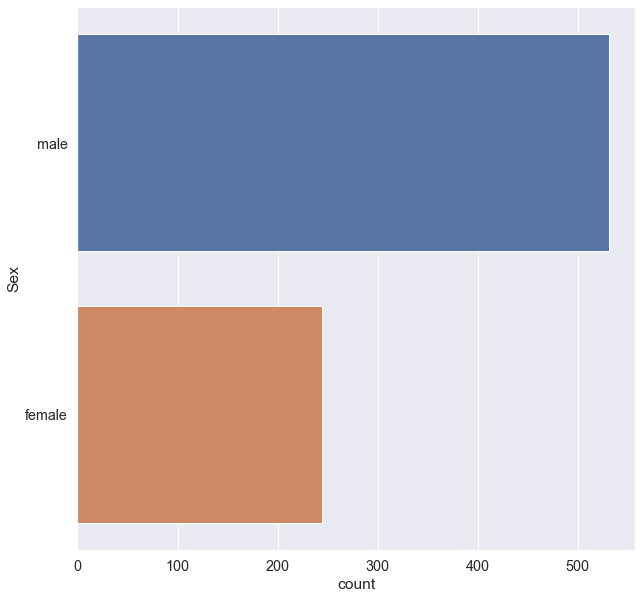

In [237]:
sns.countplot(data =df , y ='Sex' )

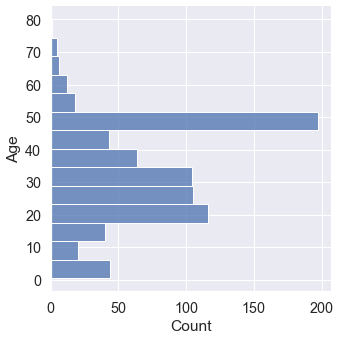

In [238]:
sns.displot(df, y = 'Age')

## Encode Sex , Embarked

In [239]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [240]:
encoder =OneHotEncoder(sparse= False , drop = 'first')

In [241]:
trans = encoder.fit_transform(df[['Sex','Embarked']])

In [242]:
trans1 = pd.DataFrame(trans,columns=encoder.get_feature_names_out())

In [243]:
df1 = pd.concat([df,trans1] , axis = 1 )

In [244]:
df1.drop(['Name','Sex','Embarked'],inplace = True,axis=1)


In [245]:
x = df1.drop('Survived',axis = 1)
y = df1['Survived']

In [246]:
x_train,x_test,y_train,y_test  = train_test_split(x,y,random_state=27,test_size=.25)

In [247]:
y_train.value_counts()

0    390
1    191
Name: Survived, dtype: int64

In [248]:
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.over_sampling import RandomOverSampler

In [249]:
sm = RandomUnderSampler(random_state=100)
x_train, y_train = sm.fit_resample(x_train, y_train )

In [250]:
y_train.value_counts()

0    191
1    191
Name: Survived, dtype: int64

In [251]:
x_train

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,2,28.0,0,0,10.5000,1.0,0.0,1.0
1,1,40.0,0,0,27.7208,1.0,0.0,0.0
2,3,50.0,0,0,7.8958,1.0,0.0,0.0
3,3,19.0,0,0,7.6500,1.0,0.0,1.0
4,1,71.0,0,0,34.6542,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
377,1,45.0,0,0,26.5500,1.0,0.0,1.0
378,1,35.0,1,0,53.1000,0.0,0.0,1.0
379,3,16.0,0,0,7.7333,0.0,1.0,0.0
380,3,38.0,1,5,31.3875,0.0,0.0,1.0


## Scaling

In [252]:
from sklearn.preprocessing import StandardScaler 

In [253]:
Scaler = StandardScaler()

In [254]:
x_train[['Age','Fare']]= Scaler.fit_transform(x_train[['Age','Fare']])
x_test[['Age','Fare']]= Scaler.transform(x_test[['Age','Fare']])

In [255]:
x_train

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,2,-0.327964,0,0,-0.613086,1.0,0.0,1.0
1,1,0.448378,0,0,0.604981,1.0,0.0,0.0
2,3,1.095330,0,0,-0.797287,1.0,0.0,0.0
3,3,-0.910220,0,0,-0.814673,1.0,0.0,1.0
4,1,2.453929,0,0,1.095396,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
377,1,0.771854,0,0,0.522167,1.0,0.0,1.0
378,1,0.124902,1,0,2.400109,0.0,0.0,1.0
379,3,-1.104306,0,0,-0.808781,0.0,1.0,0.0
380,3,0.318988,1,5,0.864335,0.0,0.0,1.0


In [256]:
Scaler.fit(x_train,y_train)

StandardScaler()

In [257]:
from sklearn.linear_model import LogisticRegression

In [258]:
log = LogisticRegression(random_state = 6)

In [259]:
log.fit(x_train,y_train)

LogisticRegression(random_state=6)

In [260]:
y_pred = log.predict(x_test)
y_pred1 = log.predict(x_train)

In [261]:
from sklearn.metrics import mean_absolute_error , accuracy_score, r2_score,confusion_matrix

In [262]:
accuracy_score(y_test,y_pred)

0.7731958762886598

In [263]:
accuracy_score(y_train,y_pred1)

0.756544502617801